In [5]:
import custom_functions as cf

import math 
import numpy as np
import pandas as pd
import uproot3 as uproot
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
from matplotlib import gridspec
import copy
plt.rcParams.update({'font.family':'serif'})

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
# After changes
import importlib
importlib.reload(cf)

<module 'custom_functions' from '/mnt/c/Users/Giacomo/Dropbox/Wirecell_related/NCpi0_training/custom_functions.py'>

# Bins Definition

In [7]:
edges_nuE = [0,4000] # MeV
edges_pi0Mom = [0, 130, 180, 240, 300, 360, 420, 500, 1200] # MeV/c
edges_pi0Mom_GeV = [x/1000. for x in edges_pi0Mom] # GeV/c
edges_pi0Cos = [-1.0, -0.6, -0.22, 0.12, 0.4, 0.6, 0.74, 0.85, 0.91, 0.96, 1.0]
#edges_pi0Cos_rebin = [-1, -0.5, -0.2, 0.1, 0.4, 0.65, 0.75, 0.85, 0.95, 1] # rebin
edges_2Dpi0Mom = [0, 130, 215, 300, 420, 1200] # MeV/c
edges_2Dpi0Mom_GeV = [x/1000. for x in edges_2Dpi0Mom] # GeV/c
edges_2Dpi0Cos = [-1.0, 0, 0.58, 0.85, 1.0]

#edges_pi0Mom_fakerebin = [0, 130, 180, 220, 260, 300, 340, 380, 420, 500, 1200]
#edges_pi0Mom_fakerebin_GeV = [x/1000. for x in edges_pi0Mom_fakerebin] # GeV/c

In [8]:
flux_0275_4 = 6.62573e-10 # Flux factor integrating numu, nue, antinumu, antinue from 0.275 to 4 GeV
flux_0_10 = 7.67125e-10   # Flux factor integrating numu, nue, antinumu, antinue from 0 to 10 GeV
ratio = flux_0_10/flux_0275_4

# NUISANCE - Import root files

In [9]:
file_nu_gen2 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.num.genie_v2_12_10.mec.flat.root"
file_nu_gen3 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.num.genie_v3_00_06.flat.root"
file_nu_neut = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.num.neut_5_4_0_1.flat.root"
file_nu_nuwro = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.num.nuwro_19_02_1.flat.root"

file_anu_gen2 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbm.genie_v2_12_10.mec.flat.root"
file_anu_gen3 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbm.genie_v3_00_06.flat.root"
file_anu_neut = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbm.neut_5_4_0_1.flat.root"
file_anu_nuwro = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbm.nuwro_19_02_1.flat.root"

file_anue_gen2 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbe.genie_v2_12_10.mec.flat.root"
file_anue_gen3 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbe.genie_v3_00_06.flat.root"
file_anue_neut = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbe.neut_5_4_0_1.flat.root"
file_anue_nuwro = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nbe.nuwro_19_02_1.flat.root"

file_nue_gen2 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nue.genie_v2_12_10.mec.flat.root"
file_nue_gen3 = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nue.genie_v3_00_06.flat.root"
file_nue_neut = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nue.neut_5_4_0_1.flat.root"
file_nue_nuwro = "/home/gs627/LEEana/processed_checkout_rootfiles/NUISANCE/bnb.ub.nue.nuwro_19_02_1.flat.root"

## Integrals from NUISANCE files

In [10]:
# Plot of BNB flux
h_numu = uproot.open(file_nu_gen3)['FlatTree_FLUX'].values
h_numu_bar = uproot.open(file_anu_gen3)['FlatTree_FLUX'].values
h_nue = uproot.open(file_nue_gen3)['FlatTree_FLUX'].values
h_nue_bar = uproot.open(file_anue_gen3)['FlatTree_FLUX'].values
bins = uproot.open(file_nu_gen3)['FlatTree_FLUX'].edges
mid_all = [(x+y)/2. for x,y in zip(bins[0:],bins[1:])]
delta_all = [(y-x) for x,y in zip(bins[0:],bins[1:])]

In [11]:
first = 0.275 # GeV
last = 4.001 # GeV

bins_index = np.where((bins>first) & (bins<=last))[0]
first_bin = bins_index[0]
last_bin = bins_index[-1]

mid = [(x+y)/2. for x,y in zip(bins[bins_index[0]:bins_index[-1]],bins[bins_index[1]:bins_index[-1]])]
delta = [(y-x) for x,y in zip(bins[bins_index[0]:bins_index[-1]],bins[bins_index[1]:bins_index[-1]])]

# First bin requires interpolation
mid.insert(0, (first+bins[first_bin])/2.)
delta.insert(0, (bins[first_bin]-first))

def interpolate_flux(valueL, valueH):
    return (valueL + valueH)/2

In [12]:
h_numu_reduced = h_numu[first_bin:last_bin]
h_numu_bar_reduced = h_numu_bar[first_bin:last_bin]
h_nue_reduced = h_nue[first_bin:last_bin]
h_nue_bar_reduced = h_nue_bar[first_bin:last_bin]

# Interpolated first point
h_numu_reduced.tolist().insert(0, (h_numu[first_bin-1]+h_numu[first_bin])/2.)
h_numu_bar_reduced.tolist().insert(0, (h_numu_bar[first_bin-1]+h_numu_bar[first_bin])/2.)
h_nue_reduced.tolist().insert(0, (h_nue[first_bin-1]+h_nue[first_bin])/2.)
h_nue_bar_reduced.tolist().insert(0, (h_nue_bar[first_bin-1]+h_nue_bar[first_bin])/2.)

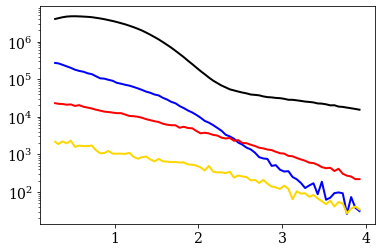

In [13]:
plt.plot(mid, h_numu_reduced, lw=2, ls='solid', color='black', label='numu')
plt.plot(mid, h_numu_bar_reduced, lw=2, ls='solid', color='blue', label='a-numu')
plt.plot(mid, h_nue_reduced, lw=2, ls='solid', color='red', label='nue')
plt.plot(mid, h_nue_bar_reduced, lw=2, ls='solid', color='gold', label='a-nue')
plt.yscale('log')

In [14]:
# Total integrate flux in (0,10) GeV
I_numu_all = 0
for x,y in zip(delta_all, h_numu): I_numu_all += x*y
I_numu_bar_all = 0
for x,y in zip(delta_all, h_numu_bar): I_numu_bar_all += x*y
I_nue_bar_all = 0
for x,y in zip(delta_all, h_nue_bar): I_nue_bar_all += x*y
I_nue_all = 0
for x,y in zip(delta_all, h_nue): I_nue_all += x*y

print('Total integrated flux numu = ',round(I_numu_all,3))
print('Total integrated flux numu_bar = ',round(I_numu_bar_all,3))
print('Total integrated flux nue_bar = ',round(I_nue_bar_all,3))
print('Total integrated flux nue = ',round(I_nue_all,3))

Total integrated flux numu =  5503931.2
Total integrated flux numu_bar =  340173.5
Total integrated flux nue_bar =  3003.7
Total integrated flux nue =  29682.05


In [15]:
# Total integrate flux in (0.275,4) GeV
I_numu_reduced = 0
for x,y in zip(delta, h_numu_reduced): I_numu_reduced += x*y
I_numu_bar_reduced = 0
for x,y in zip(delta, h_numu_bar_reduced): I_numu_bar_reduced += x*y
I_nue_reduced = 0
for x,y in zip(delta, h_nue_reduced): I_nue_reduced += x*y
I_nue_bar_reduced = 0
for x,y in zip(delta, h_nue_bar_reduced): I_nue_bar_reduced += x*y

print('Total integrated flux numu = ',round(I_numu_reduced,3))
print('Total integrated flux numu_bar = ',round(I_numu_bar_reduced,3))
print('Total integrated flux nue_bar = ',round(I_nue_bar_reduced,3))
print('Total integrated flux nue = ',round(I_nue_reduced,3))

Total integrated flux numu =  4668641.025
Total integrated flux numu_bar =  161962.25
Total integrated flux nue_bar =  2259.125
Total integrated flux nue =  23689.525


In [16]:
# flux0_10/flux0_4
print(I_numu_all / I_numu_reduced)
print(I_numu_bar_all / I_numu_bar_reduced)
print(I_nue_bar_all / I_nue_bar_reduced)
print(I_nue_all / I_nue_reduced)

1.178915056978492
2.100325847535458
1.3295855696342613
1.2529609605933418


In [17]:
# Contribution of each flavor to total integrated flux in (0,275,4) GeV
integral = I_numu_reduced+I_numu_bar_reduced+I_nue_bar_reduced+I_nue_reduced
K_numu = I_numu_reduced/integral
K_numu_bar = I_numu_bar_reduced/integral
K_nue_bar = I_nue_bar_reduced/integral
K_nue = I_nue_reduced/integral

print('Constant numu = %1.6f'%(K_numu))
print('Constant numu_bar = %1.6f'%(K_numu_bar))
print('Constant nue_bar = %1.6f'%(K_nue_bar))
print('Constant nue = %1.6f'%(K_nue))

Constant numu = 0.961308
Constant numu_bar = 0.033349
Constant nue_bar = 0.000465
Constant nue = 0.004878


## Integrals from FLUX files

In [18]:
file_flux = '/home/gs627/LEEana/flux_info/file_result_unit_per_POT_GeV_cm2.root'
h_numu = uproot.open(file_flux)['h1_numu_norm_flux'].values
h_numu_bar = uproot.open(file_flux)['h1_numu_bar_flux'].values
h_nue = uproot.open(file_flux)['h1_nue_norm_flux'].values
h_nue_bar = uproot.open(file_flux)['h1_nue_bar_flux'].values

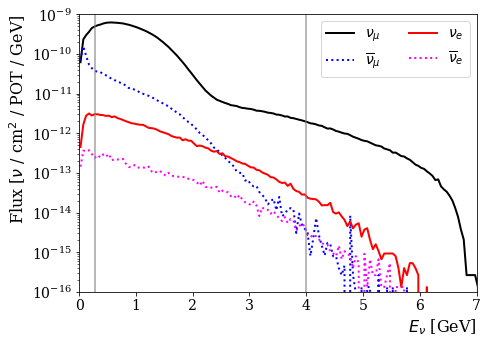

In [19]:
plt.figure(figsize=(7,5))
plt.plot(mid_all, h_numu, lw=2, ls='solid', color='black', label=r'$\nu_{\mu}$')
plt.plot(mid_all, h_numu_bar, lw=2, ls=':', color='blue', label=r'$\overline{\nu}_{\mu}$')
plt.plot(mid_all, h_nue, lw=2, ls='solid', color='red', label=r'$\nu_{e}$')
plt.plot(mid_all, h_nue_bar, lw=2, ls=':', color='magenta', label=r'$\overline{\nu}_{e}$')
plt.yscale('log')
plt.xlim(0,7)
plt.ylim(1e-16,1e-9)
plt.axvline(0.275, lw=2, ls='solid', color='grey', alpha=0.55)
plt.axvline(4, lw=2, ls='solid', color='grey', alpha=0.55)
plt.legend(loc='best',ncol=2)
plt.xlabel(r'$E_{\nu}$ [GeV]', loc='right')
plt.ylabel(r'Flux [$\nu$ / cm$^2$ / POT / GeV]', loc='top')
plt.tight_layout()
plt.savefig('efficiency_purity_plots/nu_flux.png')
plt.savefig('efficiency_purity_plots/nu_flux.pdf')
plt.show()

In [63]:
h_numu_reduced = h_numu[first_bin:last_bin]
h_numu_bar_reduced = h_numu_bar[first_bin:last_bin]
h_nue_reduced = h_nue[first_bin:last_bin]
h_nue_bar_reduced = h_nue_bar[first_bin:last_bin]

# Interpolated first point
h_numu_reduced.tolist().insert(0, (h_numu[first_bin-1]+h_numu[first_bin])/2.)
h_numu_bar_reduced.tolist().insert(0, (h_numu_bar[first_bin-1]+h_numu_bar[first_bin])/2.)
h_nue_reduced.tolist().insert(0, (h_nue[first_bin-1]+h_nue[first_bin])/2.)
h_nue_bar_reduced.tolist().insert(0, (h_nue_bar[first_bin-1]+h_nue_bar[first_bin])/2.)

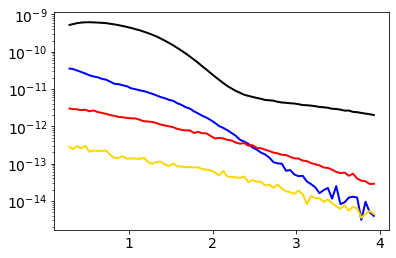

In [64]:
plt.plot(mid, h_numu_reduced, lw=2, ls='solid', color='black', label='numu')
plt.plot(mid, h_numu_bar_reduced, lw=2, ls='solid', color='blue', label='a-numu')
plt.plot(mid, h_nue_reduced, lw=2, ls='solid', color='red', label='nue')
plt.plot(mid, h_nue_bar_reduced, lw=2, ls='solid', color='gold', label='a-nue')
plt.yscale('log')

In [65]:
# Total integrate flux in (0,10) GeV
I_numu_all = 0
for x,y in zip(delta_all, h_numu): I_numu_all += x*y
I_numu_bar_all = 0
for x,y in zip(delta_all, h_numu_bar): I_numu_bar_all += x*y
I_nue_bar_all = 0
for x,y in zip(delta_all, h_nue_bar): I_nue_bar_all += x*y
I_nue_all = 0
for x,y in zip(delta_all, h_nue): I_nue_all += x*y

print('Total integrated flux numu = ',I_numu_all)
print('Total integrated flux numu_bar = ',I_numu_bar_all)
print('Total integrated flux nue_bar = ',I_nue_bar_all)
print('Total integrated flux nue = ',I_nue_all)

Total integrated flux numu =  7.199014412380955e-10
Total integrated flux numu_bar =  4.4496838392899067e-11
Total integrated flux nue_bar =  3.9372727604273813e-13
Total integrated flux nue =  3.8821754347828116e-12


In [66]:
# Total integrate flux in (0.275,4) GeV
I_numu_reduced = 0
for x,y in zip(delta, h_numu_reduced): I_numu_reduced += x*y
I_numu_bar_reduced = 0
for x,y in zip(delta, h_numu_bar_reduced): I_numu_bar_reduced += x*y
I_nue_reduced = 0
for x,y in zip(delta, h_nue_reduced): I_nue_reduced += x*y
I_nue_bar_reduced = 0
for x,y in zip(delta, h_nue_bar_reduced): I_nue_bar_reduced += x*y

print('Total integrated flux numu = ',I_numu_reduced)
print('Total integrated flux numu_bar = ',I_numu_bar_reduced)
print('Total integrated flux nue_bar = ',I_nue_bar_reduced)
print('Total integrated flux nue = ',I_nue_reduced)

Total integrated flux numu =  6.106521856626773e-10
Total integrated flux numu_bar =  2.1179082007081298e-11
Total integrated flux nue_bar =  2.9602032309357827e-13
Total integrated flux nue =  3.0981949461093776e-12


In [67]:
# flux0_10/flux0_4
print(I_numu_all / I_numu_reduced)
print(I_numu_bar_all / I_numu_bar_reduced)
print(I_nue_bar_all / I_nue_bar_reduced)
print(I_nue_all / I_nue_reduced)

1.1789058618644939
2.100980504160728
1.330068395061756
1.253044273297887


In [68]:
# Contribution of each flavor to total integrated flux in (0,275,4) GeV
integral = I_numu_reduced+I_numu_bar_reduced+I_nue_bar_reduced+I_nue_reduced
K_numu = I_numu_reduced/integral
K_numu_bar = I_numu_bar_reduced/integral
K_nue_bar = I_nue_bar_reduced/integral
K_nue = I_nue_reduced/integral

print('Constant numu = %1.6f'%(K_numu))
print('Constant numu_bar = %1.6f'%(K_numu_bar))
print('Constant nue_bar = %1.6f'%(K_nue_bar))
print('Constant nue = %1.6f'%(K_nue))

Constant numu = 0.961316
Constant numu_bar = 0.033341
Constant nue_bar = 0.000466
Constant nue = 0.004877


## Integrals imported from EXCEL + batch.sh

In [69]:
# From C++/Excel script
K_numu = 0.95991
K_numu_bar = 0.03472
K_nue_bar = 0.00047
K_nue = 0.00490

I_numu_all = 7.18878E-10
I_numu_reduced = 6.36011E-10

I_numu_bar_all = 4.39793E-11
I_numu_bar_reduced = 2.30035E-11

I_nue_bar_all = 3.92389E-13
I_nue_bar_reduced = 3.09110E-13

I_nue_all = 3.87486E-12
I_nue_reduced = 3.24917E-12

## Calculate cross sections (event selection in NUISANCE)

In [70]:
# Generate trees and create dataframes with useful variables
T_nu_gen2 = uproot.open(file_nu_gen2)['FlatTree_VARS']
T_nu_gen3 = uproot.open(file_nu_gen3)['FlatTree_VARS']
T_nu_neut = uproot.open(file_nu_neut)['FlatTree_VARS']
T_nu_nuwro = uproot.open(file_nu_nuwro)['FlatTree_VARS']

T_anu_gen2 = uproot.open(file_anu_gen2)['FlatTree_VARS']
T_anu_gen3 = uproot.open(file_anu_gen3)['FlatTree_VARS']
T_anu_neut = uproot.open(file_anu_neut)['FlatTree_VARS']
T_anu_nuwro = uproot.open(file_anu_nuwro)['FlatTree_VARS']

T_anue_gen2 = uproot.open(file_anue_gen2)['FlatTree_VARS']
T_anue_gen3 = uproot.open(file_anue_gen3)['FlatTree_VARS']
T_anue_neut = uproot.open(file_anue_neut)['FlatTree_VARS']
T_anue_nuwro = uproot.open(file_anue_nuwro)['FlatTree_VARS']

T_nue_gen2 = uproot.open(file_nue_gen2)['FlatTree_VARS']
T_nue_gen3 = uproot.open(file_nue_gen3)['FlatTree_VARS']
T_nue_neut = uproot.open(file_nue_neut)['FlatTree_VARS']
T_nue_nuwro = uproot.open(file_nue_nuwro)['FlatTree_VARS']

#"cc [0:NC, 1:CC]
#"tgta [40, target A]
#"Enu_true [Neutrino initial energy]
#"fScaleFactor [Scaling weight]
#"nfsp [Number of "final state" particles]
#"pdg [Same as usual, 111:pi0]
#"px" [Momentum component x GeV]
#"py" [Momentum component y GeV]
#"pz" [Momentum component z GeV]
flat_variables = ['Mode', 'nfsp', 'cc', 'tgta', 'Enu_true', 'pdg', 'px', 'py', 'pz', 'fScaleFactor', 'flagNC1pi0',
                  'nvertp', 'pdg_init', 'px_init', 'py_init', 'pz_init']

df_nu_gen2 = T_nu_gen2.pandas.df(flat_variables, flatten=False)
df_nu_gen3 = T_nu_gen3.pandas.df(flat_variables, flatten=False)
df_nu_neut = T_nu_neut.pandas.df(flat_variables, flatten=False)
df_nu_nuwro = T_nu_nuwro.pandas.df(flat_variables, flatten=False)

df_anu_gen2 = T_anu_gen2.pandas.df(flat_variables, flatten=False)
df_anu_gen3 = T_anu_gen3.pandas.df(flat_variables, flatten=False)
df_anu_neut = T_anu_neut.pandas.df(flat_variables, flatten=False)
df_anu_nuwro = T_anu_nuwro.pandas.df(flat_variables, flatten=False)

df_anue_gen2 = T_anue_gen2.pandas.df(flat_variables, flatten=False)
df_anue_gen3 = T_anue_gen3.pandas.df(flat_variables, flatten=False)
df_anue_neut = T_anue_neut.pandas.df(flat_variables, flatten=False)
df_anue_nuwro = T_anue_nuwro.pandas.df(flat_variables, flatten=False)

df_nue_gen2 = T_nue_gen2.pandas.df(flat_variables, flatten=False)
df_nue_gen3 = T_nue_gen3.pandas.df(flat_variables, flatten=False)
df_nue_neut = T_nue_neut.pandas.df(flat_variables, flatten=False)
df_nue_nuwro = T_nue_nuwro.pandas.df(flat_variables, flatten=False)

KeyboardInterrupt: 

In [23]:
df_nu_gen2 = cf.count_pi0(cf.is_NUISANCE_NC(df_nu_gen2))
df_nu_gen3 = cf.count_pi0(cf.is_NUISANCE_NC(df_nu_gen3))
df_nu_neut = cf.count_pi0(cf.is_NUISANCE_NC(df_nu_neut))
df_nu_nuwro = cf.count_pi0(cf.is_NUISANCE_NC(df_nu_nuwro))

df_anu_gen2 = cf.count_pi0(cf.is_NUISANCE_NC(df_anu_gen2))
df_anu_gen3 = cf.count_pi0(cf.is_NUISANCE_NC(df_anu_gen3))
df_anu_neut = cf.count_pi0(cf.is_NUISANCE_NC(df_anu_neut))
df_anu_nuwro = cf.count_pi0(cf.is_NUISANCE_NC(df_anu_nuwro))

df_anue_gen2 = cf.count_pi0(cf.is_NUISANCE_NC(df_anue_gen2))
df_anue_gen3 = cf.count_pi0(cf.is_NUISANCE_NC(df_anue_gen3))
df_anue_neut = cf.count_pi0(cf.is_NUISANCE_NC(df_anue_neut))
df_anue_nuwro = cf.count_pi0(cf.is_NUISANCE_NC(df_anue_nuwro))

df_nue_gen2 = cf.count_pi0(cf.is_NUISANCE_NC(df_nue_gen2))
df_nue_gen3 = cf.count_pi0(cf.is_NUISANCE_NC(df_nue_gen3))
df_nue_neut = cf.count_pi0(cf.is_NUISANCE_NC(df_nue_neut))
df_nue_nuwro = cf.count_pi0(cf.is_NUISANCE_NC(df_nue_nuwro))

In [24]:
# Generate dataframes for NCpi0 Xp, 0p, Np, and get true cross section
def true_xs(df, flux0_10, flux0_4):
    df_Xp = cf.is_NUISANCE_1pi0(df)
    df_0p = cf.is_NUISANCE_0p(df_Xp)
    df_Np = cf.is_NUISANCE_Np(df_Xp)
    
    xs_mom = cf.NUISANCE_xs_diff(df_Xp, flux0_10, flux0_4, edges_pi0Mom_GeV, types='mom', nucleon=True)
    xs_mom_0p = cf.NUISANCE_xs_diff(df_0p, flux0_10, flux0_4, edges_pi0Mom_GeV, types='mom', nucleon=True)
    xs_mom_Np = cf.NUISANCE_xs_diff(df_Np, flux0_10, flux0_4, edges_pi0Mom_GeV, types='mom', nucleon=True)
    
    xs_cos = cf.NUISANCE_xs_diff(df_Xp, flux0_10, flux0_4, edges_pi0Cos, types='cos', nucleon=True)
    xs_cos_0p = cf.NUISANCE_xs_diff(df_0p, flux0_10, flux0_4, edges_pi0Cos, types='cos', nucleon=True)
    xs_cos_Np = cf.NUISANCE_xs_diff(df_Np, flux0_10, flux0_4, edges_pi0Cos, types='cos', nucleon=True)
    
    return [xs_mom, xs_mom_0p, xs_mom_Np], [xs_cos, xs_cos_0p, xs_cos_Np]

In [25]:
def true_2D_xs(df, flux0_10, flux0_4):
    slices = edges_2Dpi0Cos #[-1.0, 0, 0.58, 0.85, 1.0]
    df_Xp = cf.is_NUISANCE_1pi0(df)
    
    xs_mom_theta0 = cf.NUISANCE_xs_2D_diff(df_Xp, flux0_10, flux0_4, edges_2Dpi0Mom_GeV, slice=[edges_2Dpi0Cos[0],edges_2Dpi0Cos[1]], types='mom', nucleon=True)
    xs_mom_theta1 = cf.NUISANCE_xs_2D_diff(df_Xp, flux0_10, flux0_4, edges_2Dpi0Mom_GeV, slice=[edges_2Dpi0Cos[1],edges_2Dpi0Cos[2]], types='mom', nucleon=True)
    xs_mom_theta2 = cf.NUISANCE_xs_2D_diff(df_Xp, flux0_10, flux0_4, edges_2Dpi0Mom_GeV, slice=[edges_2Dpi0Cos[2],edges_2Dpi0Cos[3]], types='mom', nucleon=True)
    xs_mom_theta3 = cf.NUISANCE_xs_2D_diff(df_Xp, flux0_10, flux0_4, edges_2Dpi0Mom_GeV, slice=[edges_2Dpi0Cos[3],edges_2Dpi0Cos[4]], types='mom', nucleon=True)
    
    return xs_mom_theta0, xs_mom_theta1, xs_mom_theta2, xs_mom_theta3

In [26]:
# True cross sections weighted
def merge_xs(xs_nu, xs_anu, xs_anue, xs_nue):
    if type(xs_nu)==float: return (xs_nu*K_numu + xs_anu*K_numu_bar + xs_anue*K_nue_bar + xs_nue*K_nue)
    if len(xs_nu): return [A*K_numu + B*K_numu_bar + C*K_nue_bar + D*K_nue for A,B,C,D in zip(xs_nu, xs_anu, xs_anue, xs_nue)]

### GENIEv2 ----- (REMEMBER multiply by Ac matrix before comparing)

### 1D

In [27]:
[xs_mom_nu_gen2, xs_mom_nu_gen2_0p, xs_mom_nu_gen2_Np], [xs_cos_nu_gen2, xs_cos_nu_gen2_0p, xs_cos_nu_gen2_Np] = true_xs(df_nu_gen2, I_numu_all, I_numu_reduced)
[xs_mom_anu_gen2, xs_mom_anu_gen2_0p, xs_mom_anu_gen2_Np], [xs_cos_anu_gen2, xs_cos_anu_gen2_0p, xs_cos_anu_gen2_Np] = true_xs(df_anu_gen2, I_numu_bar_all, I_numu_bar_reduced)
[xs_mom_anue_gen2, xs_mom_anue_gen2_0p, xs_mom_anue_gen2_Np], [xs_cos_anue_gen2, xs_cos_anue_gen2_0p, xs_cos_anue_gen2_Np] = true_xs(df_anue_gen2, I_nue_bar_all, I_nue_bar_reduced)
[xs_mom_nue_gen2, xs_mom_nue_gen2_0p, xs_mom_nue_gen2_Np], [xs_cos_nue_gen2, xs_cos_nue_gen2_0p, xs_cos_nue_gen2_Np] = true_xs(df_nue_gen2, I_nue_all, I_nue_reduced)

In [28]:
xs_mom_gen2 = merge_xs(xs_mom_nu_gen2, xs_mom_anu_gen2, xs_mom_anue_gen2, xs_mom_nue_gen2)
xs_mom_gen2_0p = merge_xs(xs_mom_nu_gen2_0p, xs_mom_anu_gen2_0p, xs_mom_anue_gen2_0p, xs_mom_nue_gen2_0p)
xs_mom_gen2_Np = merge_xs(xs_mom_nu_gen2_Np, xs_mom_anu_gen2_Np, xs_mom_anue_gen2_Np, xs_mom_nue_gen2_Np)

xs_cos_gen2 = merge_xs(xs_cos_nu_gen2, xs_cos_anu_gen2, xs_cos_anue_gen2, xs_cos_nue_gen2)
xs_cos_gen2_0p = merge_xs(xs_cos_nu_gen2_0p, xs_cos_anu_gen2_0p, xs_cos_anue_gen2_0p, xs_cos_nue_gen2_0p)
xs_cos_gen2_Np = merge_xs(xs_cos_nu_gen2_Np, xs_cos_anu_gen2_Np, xs_cos_anue_gen2_Np, xs_cos_nue_gen2_Np)

### 2D

In [29]:
xs_mom_nu_gen2_theta0, xs_mom_nu_gen2_theta1, xs_mom_nu_gen2_theta2, xs_mom_nu_gen2_theta3 = true_2D_xs(df_nu_gen2, I_numu_all, I_numu_reduced)
xs_mom_anu_gen2_theta0, xs_mom_anu_gen2_theta1, xs_mom_anu_gen2_theta2, xs_mom_anu_gen2_theta3 = true_2D_xs(df_anu_gen2, I_numu_bar_all, I_numu_bar_reduced)
xs_mom_anue_gen2_theta0, xs_mom_anue_gen2_theta1, xs_mom_anue_gen2_theta2, xs_mom_anue_gen2_theta3 = true_2D_xs(df_anue_gen2, I_nue_bar_all, I_nue_bar_reduced)
xs_mom_nue_gen2_theta0, xs_mom_nue_gen2_theta1, xs_mom_nue_gen2_theta2, xs_mom_nue_gen2_theta3 = true_2D_xs(df_nue_gen2, I_nue_all, I_nue_reduced)

In [30]:
xs_mom_gen2_theta0 = merge_xs(xs_mom_nu_gen2_theta0, xs_mom_anu_gen2_theta0, xs_mom_anue_gen2_theta0, xs_mom_nue_gen2_theta0)
xs_mom_gen2_theta1 = merge_xs(xs_mom_nu_gen2_theta1, xs_mom_anu_gen2_theta1, xs_mom_anue_gen2_theta1, xs_mom_nue_gen2_theta1)
xs_mom_gen2_theta2 = merge_xs(xs_mom_nu_gen2_theta2, xs_mom_anu_gen2_theta2, xs_mom_anue_gen2_theta2, xs_mom_nue_gen2_theta2)
xs_mom_gen2_theta3 = merge_xs(xs_mom_nu_gen2_theta3, xs_mom_anu_gen2_theta3, xs_mom_anue_gen2_theta3, xs_mom_nue_gen2_theta3)

### NUWRO ----- (REMEMBER multiply by Ac matrix before comparing)

### 1D

In [31]:
[xs_mom_nu_nuwro, xs_mom_nu_nuwro_0p, xs_mom_nu_nuwro_Np], [xs_cos_nu_nuwro, xs_cos_nu_nuwro_0p, xs_cos_nu_nuwro_Np] = true_xs(df_nu_nuwro, I_numu_all, I_numu_reduced)
[xs_mom_anu_nuwro, xs_mom_anu_nuwro_0p, xs_mom_anu_nuwro_Np], [xs_cos_anu_nuwro, xs_cos_anu_nuwro_0p, xs_cos_anu_nuwro_Np] = true_xs(df_anu_nuwro, I_numu_bar_all, I_numu_bar_reduced)
[xs_mom_anue_nuwro, xs_mom_anue_nuwro_0p, xs_mom_anue_nuwro_Np], [xs_cos_anue_nuwro, xs_cos_anue_nuwro_0p, xs_cos_anue_nuwro_Np] = true_xs(df_anue_nuwro, I_nue_bar_all, I_nue_bar_reduced)
[xs_mom_nue_nuwro, xs_mom_nue_nuwro_0p, xs_mom_nue_nuwro_Np], [xs_cos_nue_nuwro, xs_cos_nue_nuwro_0p, xs_cos_nue_nuwro_Np] = true_xs(df_nue_nuwro, I_nue_all, I_nue_reduced)

In [32]:
xs_mom_nuwro = merge_xs(xs_mom_nu_nuwro, xs_mom_anu_nuwro, xs_mom_anue_nuwro, xs_mom_nue_nuwro)
xs_mom_nuwro_0p = merge_xs(xs_mom_nu_nuwro_0p, xs_mom_anu_nuwro_0p, xs_mom_anue_nuwro_0p, xs_mom_nue_nuwro_0p)
xs_mom_nuwro_Np = merge_xs(xs_mom_nu_nuwro_Np, xs_mom_anu_nuwro_Np, xs_mom_anue_nuwro_Np, xs_mom_nue_nuwro_Np)

xs_cos_nuwro = merge_xs(xs_cos_nu_nuwro, xs_cos_anu_nuwro, xs_cos_anue_nuwro, xs_cos_nue_nuwro)
xs_cos_nuwro_0p = merge_xs(xs_cos_nu_nuwro_0p, xs_cos_anu_nuwro_0p, xs_cos_anue_nuwro_0p, xs_cos_nue_nuwro_0p)
xs_cos_nuwro_Np = merge_xs(xs_cos_nu_nuwro_Np, xs_cos_anu_nuwro_Np, xs_cos_anue_nuwro_Np, xs_cos_nue_nuwro_Np)

### 2D

In [33]:
xs_mom_nu_nuwro_theta0, xs_mom_nu_nuwro_theta1, xs_mom_nu_nuwro_theta2, xs_mom_nu_nuwro_theta3 = true_2D_xs(df_nu_nuwro, I_numu_all, I_numu_reduced)
xs_mom_anu_nuwro_theta0, xs_mom_anu_nuwro_theta1, xs_mom_anu_nuwro_theta2, xs_mom_anu_nuwro_theta3 = true_2D_xs(df_anu_nuwro, I_numu_bar_all, I_numu_bar_reduced)
xs_mom_anue_nuwro_theta0, xs_mom_anue_nuwro_theta1, xs_mom_anue_nuwro_theta2, xs_mom_anue_nuwro_theta3 = true_2D_xs(df_anue_nuwro, I_nue_bar_all, I_nue_bar_reduced)
xs_mom_nue_nuwro_theta0, xs_mom_nue_nuwro_theta1, xs_mom_nue_nuwro_theta2, xs_mom_nue_nuwro_theta3 = true_2D_xs(df_nue_nuwro, I_nue_all, I_nue_reduced)

In [34]:
xs_mom_nuwro_theta0 = merge_xs(xs_mom_nu_nuwro_theta0, xs_mom_anu_nuwro_theta0, xs_mom_anue_nuwro_theta0, xs_mom_nue_nuwro_theta0)
xs_mom_nuwro_theta1 = merge_xs(xs_mom_nu_nuwro_theta1, xs_mom_anu_nuwro_theta1, xs_mom_anue_nuwro_theta1, xs_mom_nue_nuwro_theta1)
xs_mom_nuwro_theta2 = merge_xs(xs_mom_nu_nuwro_theta2, xs_mom_anu_nuwro_theta2, xs_mom_anue_nuwro_theta2, xs_mom_nue_nuwro_theta2)
xs_mom_nuwro_theta3 = merge_xs(xs_mom_nu_nuwro_theta3, xs_mom_anu_nuwro_theta3, xs_mom_anue_nuwro_theta3, xs_mom_nue_nuwro_theta3)

### GENIEv3 ----- (REMEMBER multiply by Ac matrix before comparing)

### 1D

In [35]:
[xs_mom_nu_gen3, xs_mom_nu_gen3_0p, xs_mom_nu_gen3_Np], [xs_cos_nu_gen3, xs_cos_nu_gen3_0p, xs_cos_nu_gen3_Np] = true_xs(df_nu_gen3, I_numu_all, I_numu_reduced)
[xs_mom_anu_gen3, xs_mom_anu_gen3_0p, xs_mom_anu_gen3_Np], [xs_cos_anu_gen3, xs_cos_anu_gen3_0p, xs_cos_anu_gen3_Np] = true_xs(df_anu_gen3, I_numu_bar_all, I_numu_bar_reduced)
[xs_mom_anue_gen3, xs_mom_anue_gen3_0p, xs_mom_anue_gen3_Np], [xs_cos_anue_gen3, xs_cos_anue_gen3_0p, xs_cos_anue_gen3_Np] = true_xs(df_anue_gen3, I_nue_bar_all, I_nue_bar_reduced)
[xs_mom_nue_gen3, xs_mom_nue_gen3_0p, xs_mom_nue_gen3_Np], [xs_cos_nue_gen3, xs_cos_nue_gen3_0p, xs_cos_nue_gen3_Np] = true_xs(df_nue_gen3, I_nue_all, I_nue_reduced)

In [36]:
xs_mom_gen3 = merge_xs(xs_mom_nu_gen3, xs_mom_anu_gen3, xs_mom_anue_gen3, xs_mom_nue_gen3)
xs_mom_gen3_0p = merge_xs(xs_mom_nu_gen3_0p, xs_mom_anu_gen3_0p, xs_mom_anue_gen3_0p, xs_mom_nue_gen3_0p)
xs_mom_gen3_Np = merge_xs(xs_mom_nu_gen3_Np, xs_mom_anu_gen3_Np, xs_mom_anue_gen3_Np, xs_mom_nue_gen3_Np)

xs_cos_gen3 = merge_xs(xs_cos_nu_gen3, xs_cos_anu_gen3, xs_cos_anue_gen3, xs_cos_nue_gen3)
xs_cos_gen3_0p = merge_xs(xs_cos_nu_gen3_0p, xs_cos_anu_gen3_0p, xs_cos_anue_gen3_0p, xs_cos_nue_gen3_0p)
xs_cos_gen3_Np = merge_xs(xs_cos_nu_gen3_Np, xs_cos_anu_gen3_Np, xs_cos_anue_gen3_Np, xs_cos_nue_gen3_Np)

### 2D

In [37]:
xs_mom_nu_gen3_theta0, xs_mom_nu_gen3_theta1, xs_mom_nu_gen3_theta2, xs_mom_nu_gen3_theta3 = true_2D_xs(df_nu_gen3, I_numu_all, I_numu_reduced)
xs_mom_anu_gen3_theta0, xs_mom_anu_gen3_theta1, xs_mom_anu_gen3_theta2, xs_mom_anu_gen3_theta3 = true_2D_xs(df_anu_gen3, I_numu_bar_all, I_numu_bar_reduced)
xs_mom_anue_gen3_theta0, xs_mom_anue_gen3_theta1, xs_mom_anue_gen3_theta2, xs_mom_anue_gen3_theta3 = true_2D_xs(df_anue_gen3, I_nue_bar_all, I_nue_bar_reduced)
xs_mom_nue_gen3_theta0, xs_mom_nue_gen3_theta1, xs_mom_nue_gen3_theta2, xs_mom_nue_gen3_theta3 = true_2D_xs(df_nue_gen3, I_nue_all, I_nue_reduced)

In [38]:
xs_mom_gen3_theta0 = merge_xs(xs_mom_nu_gen3_theta0, xs_mom_anu_gen3_theta0, xs_mom_anue_gen3_theta0, xs_mom_nue_gen3_theta0)
xs_mom_gen3_theta1 = merge_xs(xs_mom_nu_gen3_theta1, xs_mom_anu_gen3_theta1, xs_mom_anue_gen3_theta1, xs_mom_nue_gen3_theta1)
xs_mom_gen3_theta2 = merge_xs(xs_mom_nu_gen3_theta2, xs_mom_anu_gen3_theta2, xs_mom_anue_gen3_theta2, xs_mom_nue_gen3_theta2)
xs_mom_gen3_theta3 = merge_xs(xs_mom_nu_gen3_theta3, xs_mom_anu_gen3_theta3, xs_mom_anue_gen3_theta3, xs_mom_nue_gen3_theta3)

### NEUT ----- (REMEMBER multiply by Ac matrix before comparing)

### 1D

In [39]:
[xs_mom_nu_neut, xs_mom_nu_neut_0p, xs_mom_nu_neut_Np], [xs_cos_nu_neut, xs_cos_nu_neut_0p, xs_cos_nu_neut_Np] = true_xs(df_nu_neut, I_numu_all, I_numu_reduced)
[xs_mom_anu_neut, xs_mom_anu_neut_0p, xs_mom_anu_neut_Np], [xs_cos_anu_neut, xs_cos_anu_neut_0p, xs_cos_anu_neut_Np] = true_xs(df_anu_neut, I_numu_bar_all, I_numu_bar_reduced)
[xs_mom_anue_neut, xs_mom_anue_neut_0p, xs_mom_anue_neut_Np], [xs_cos_anue_neut, xs_cos_anue_neut_0p, xs_cos_anue_neut_Np] = true_xs(df_anue_neut, I_nue_bar_all, I_nue_bar_reduced)
[xs_mom_nue_neut, xs_mom_nue_neut_0p, xs_mom_nue_neut_Np], [xs_cos_nue_neut, xs_cos_nue_neut_0p, xs_cos_nue_neut_Np] = true_xs(df_nue_neut, I_nue_all, I_nue_reduced)

In [40]:
xs_mom_neut = merge_xs(xs_mom_nu_neut, xs_mom_anu_neut, xs_mom_anue_neut, xs_mom_nue_neut)
xs_mom_neut_0p = merge_xs(xs_mom_nu_neut_0p, xs_mom_anu_neut_0p, xs_mom_anue_neut_0p, xs_mom_nue_neut_0p)
xs_mom_neut_Np = merge_xs(xs_mom_nu_neut_Np, xs_mom_anu_neut_Np, xs_mom_anue_neut_Np, xs_mom_nue_neut_Np)

xs_cos_neut = merge_xs(xs_cos_nu_neut, xs_cos_anu_neut, xs_cos_anue_neut, xs_cos_nue_neut)
xs_cos_neut_0p = merge_xs(xs_cos_nu_neut_0p, xs_cos_anu_neut_0p, xs_cos_anue_neut_0p, xs_cos_nue_neut_0p)
xs_cos_neut_Np = merge_xs(xs_cos_nu_neut_Np, xs_cos_anu_neut_Np, xs_cos_anue_neut_Np, xs_cos_nue_neut_Np)

### 2D

In [41]:
xs_mom_nu_neut_theta0, xs_mom_nu_neut_theta1, xs_mom_nu_neut_theta2, xs_mom_nu_neut_theta3 = true_2D_xs(df_nu_neut, I_numu_all, I_numu_reduced)
xs_mom_anu_neut_theta0, xs_mom_anu_neut_theta1, xs_mom_anu_neut_theta2, xs_mom_anu_neut_theta3 = true_2D_xs(df_anu_neut, I_numu_bar_all, I_numu_bar_reduced)
xs_mom_anue_neut_theta0, xs_mom_anue_neut_theta1, xs_mom_anue_neut_theta2, xs_mom_anue_neut_theta3 = true_2D_xs(df_anue_neut, I_nue_bar_all, I_nue_bar_reduced)
xs_mom_nue_neut_theta0, xs_mom_nue_neut_theta1, xs_mom_nue_neut_theta2, xs_mom_nue_neut_theta3 = true_2D_xs(df_nue_neut, I_nue_all, I_nue_reduced)

In [42]:
xs_mom_neut_theta0 = merge_xs(xs_mom_nu_neut_theta0, xs_mom_anu_neut_theta0, xs_mom_anue_neut_theta0, xs_mom_nue_neut_theta0)
xs_mom_neut_theta1 = merge_xs(xs_mom_nu_neut_theta1, xs_mom_anu_neut_theta1, xs_mom_anue_neut_theta1, xs_mom_nue_neut_theta1)
xs_mom_neut_theta2 = merge_xs(xs_mom_nu_neut_theta2, xs_mom_anu_neut_theta2, xs_mom_anue_neut_theta2, xs_mom_nue_neut_theta2)
xs_mom_neut_theta3 = merge_xs(xs_mom_nu_neut_theta3, xs_mom_anu_neut_theta3, xs_mom_anue_neut_theta3, xs_mom_nue_neut_theta3)

### MOMENTUM

### 1D

In [43]:
# XS Xp
print([round(x,5) for x in xs_mom_nuwro])
print([round(x,5) for x in xs_mom_gen2])
print([round(x,5) for x in xs_mom_gen3])
print([round(x,5) for x in xs_mom_neut])

[0.39143, 1.59754, 1.41524, 0.9337, 0.79534, 0.66347, 0.47036, 0.10301]
[0.65056, 1.35038, 1.39189, 1.25132, 1.12227, 0.88741, 0.54975, 0.1033]
[0.58109, 1.65382, 1.3533, 0.9709, 0.8072, 0.6802, 0.46043, 0.08626]
[0.50683, 1.61238, 1.08863, 0.74154, 0.72513, 0.59447, 0.42102, 0.08392]


In [44]:
# XS 0pNp
print([round(x,5) for x in xs_mom_nuwro_0p+xs_mom_nuwro_Np])
print([round(x,5) for x in xs_mom_gen2_0p+xs_mom_gen2_Np])
print([round(x,5) for x in xs_mom_gen3_0p+xs_mom_gen3_Np])
print([round(x,5) for x in xs_mom_neut_0p+xs_mom_neut_Np])

[0.16995, 0.75789, 0.75869, 0.55164, 0.46664, 0.39643, 0.27763, 0.0645, 0.22149, 0.83965, 0.65655, 0.38206, 0.3287, 0.26704, 0.19273, 0.03851]
[0.24003, 0.5461, 0.66202, 0.6334, 0.58732, 0.45121, 0.27388, 0.05395, 0.41053, 0.80428, 0.72987, 0.61792, 0.53495, 0.43619, 0.27587, 0.04935]
[0.17594, 0.56602, 0.52873, 0.40754, 0.34524, 0.29641, 0.20655, 0.04336, 0.40515, 1.0878, 0.82457, 0.56336, 0.46196, 0.38378, 0.25388, 0.0429]
[0.1768, 0.69669, 0.51386, 0.38492, 0.37514, 0.29944, 0.21391, 0.04297, 0.33002, 0.91569, 0.57477, 0.35662, 0.34999, 0.29503, 0.2071, 0.04094]


### 2D

In [45]:
# XS Xp
print([round(x,5) for x in xs_mom_nuwro_theta0])
print([round(x,5) for x in xs_mom_gen2_theta0])
print([round(x,5) for x in xs_mom_gen3_theta0])
print([round(x,5) for x in xs_mom_neut_theta0])

[0.2224, 0.75326, 0.25745, 0.07776, 0.00281]
[0.34146, 0.63467, 0.3303, 0.10328, 0.00318]
[0.32445, 0.75149, 0.26093, 0.07441, 0.00181]
[0.26723, 0.76375, 0.18449, 0.05459, 0.0022]


In [46]:
print([round(x,5) for x in xs_mom_nuwro_theta1])
print([round(x,5) for x in xs_mom_gen2_theta1])
print([round(x,5) for x in xs_mom_gen3_theta1])
print([round(x,5) for x in xs_mom_neut_theta1])

[0.1018, 0.5159, 0.36767, 0.20258, 0.01912]
[0.18327, 0.43048, 0.47144, 0.33977, 0.02826]
[0.14886, 0.50546, 0.39077, 0.23054, 0.01945]
[0.13888, 0.40885, 0.27187, 0.18475, 0.01834]


In [47]:
print([round(x,5) for x in xs_mom_nuwro_theta2])
print([round(x,5) for x in xs_mom_gen2_theta2])
print([round(x,5) for x in xs_mom_gen3_theta2])
print([round(x,5) for x in xs_mom_neut_theta2])

[0.04255, 0.20545, 0.2321, 0.22446, 0.04075]
[0.0793, 0.19816, 0.29246, 0.30873, 0.05217]
[0.06781, 0.20803, 0.23697, 0.24025, 0.04372]
[0.06484, 0.18365, 0.18792, 0.21041, 0.0381]


In [48]:
print([round(x,5) for x in xs_mom_nuwro_theta3])
print([round(x,5) for x in xs_mom_gen2_theta3])
print([round(x,5) for x in xs_mom_gen3_theta3])
print([round(x,5) for x in xs_mom_neut_theta3])

[0.02468, 0.10494, 0.16104, 0.22461, 0.07801]
[0.04653, 0.11397, 0.18866, 0.25305, 0.06549]
[0.03997, 0.11095, 0.14885, 0.1985, 0.05967]
[0.03588, 0.1031, 0.1367, 0.21005, 0.05985]


In [51]:
print([round(x,5) for x in xs_mom_nuwro_theta0+xs_mom_nuwro_theta1+xs_mom_nuwro_theta2+xs_mom_nuwro_theta3])
print([round(x,5) for x in xs_mom_gen2_theta0+xs_mom_gen2_theta1+xs_mom_gen2_theta2+xs_mom_gen2_theta3])
print([round(x,5) for x in xs_mom_gen3_theta0+xs_mom_gen3_theta1+xs_mom_gen3_theta2+xs_mom_gen3_theta3])
print([round(x,5) for x in xs_mom_neut_theta0+xs_mom_neut_theta1+xs_mom_neut_theta2+xs_mom_neut_theta3])

[0.2224, 0.75326, 0.25745, 0.07776, 0.00281, 0.1018, 0.5159, 0.36767, 0.20258, 0.01912, 0.04255, 0.20545, 0.2321, 0.22446, 0.04075, 0.02468, 0.10494, 0.16104, 0.22461, 0.07801]
[0.34146, 0.63467, 0.3303, 0.10328, 0.00318, 0.18327, 0.43048, 0.47144, 0.33977, 0.02826, 0.0793, 0.19816, 0.29246, 0.30873, 0.05217, 0.04653, 0.11397, 0.18866, 0.25305, 0.06549]
[0.32445, 0.75149, 0.26093, 0.07441, 0.00181, 0.14886, 0.50546, 0.39077, 0.23054, 0.01945, 0.06781, 0.20803, 0.23697, 0.24025, 0.04372, 0.03997, 0.11095, 0.14885, 0.1985, 0.05967]
[0.26723, 0.76375, 0.18449, 0.05459, 0.0022, 0.13888, 0.40885, 0.27187, 0.18475, 0.01834, 0.06484, 0.18365, 0.18792, 0.21041, 0.0381, 0.03588, 0.1031, 0.1367, 0.21005, 0.05985]


### COSTHETA

In [49]:
# XS Xp
print([round(x,5) for x in xs_cos_nuwro])
print([round(x,5) for x in xs_cos_gen2])
print([round(x,5) for x in xs_cos_gen3])
print([round(x,5) for x in xs_cos_neut])

[0.10779, 0.12927, 0.16307, 0.2058, 0.27315, 0.33922, 0.43747, 0.59859, 0.78807, 1.10955]
[0.11453, 0.14492, 0.19471, 0.26795, 0.35211, 0.44395, 0.54589, 0.64192, 0.78199, 0.97819]
[0.11769, 0.14131, 0.17877, 0.22518, 0.29446, 0.37579, 0.46094, 0.55794, 0.67244, 0.85399]
[0.11136, 0.12465, 0.14579, 0.18426, 0.24307, 0.30842, 0.42083, 0.54538, 0.65355, 0.85739]


In [50]:
# XS 0pNp
print([round(x,5) for x in xs_cos_nuwro_0p+xs_cos_nuwro_Np])
print([round(x,5) for x in xs_cos_gen2_0p+xs_cos_gen2_Np])
print([round(x,5) for x in xs_cos_gen3_0p+xs_cos_gen3_Np])
print([round(x,5) for x in xs_cos_neut_0p+xs_cos_neut_Np])

[0.04983, 0.06324, 0.08105, 0.10447, 0.13878, 0.18268, 0.24523, 0.37277, 0.52974, 0.80314, 0.05796, 0.06602, 0.08202, 0.10132, 0.13436, 0.15654, 0.19223, 0.22582, 0.25832, 0.30641]
[0.04058, 0.05718, 0.08062, 0.11828, 0.16203, 0.22222, 0.28511, 0.3432, 0.44912, 0.60133, 0.07395, 0.08775, 0.1141, 0.14967, 0.19009, 0.22172, 0.26078, 0.29872, 0.33287, 0.37686]
[0.03503, 0.04467, 0.06328, 0.08441, 0.11833, 0.15578, 0.20816, 0.25782, 0.33868, 0.44956, 0.08265, 0.09664, 0.11549, 0.14077, 0.17613, 0.22001, 0.25277, 0.30013, 0.33377, 0.40443]
[0.04703, 0.05189, 0.06173, 0.07901, 0.10697, 0.14173, 0.20537, 0.28744, 0.35831, 0.51582, 0.06434, 0.07276, 0.08406, 0.10525, 0.1361, 0.16669, 0.21546, 0.25794, 0.29524, 0.34157]


In [ ]:
# Hajie C++ script
'''
void Differential_XS(){

    TString filename[4];

    filename[0] = "/home/hanjie/Desktop/MicroBooNE/analysis/flat_trees/flat/bnb.ub.num.genie_v3_00_06.flat.root";
    filename[1] = "/home/hanjie/Desktop/MicroBooNE/analysis/flat_trees/flat/bnb.ub.num.genie_v2_12_10.mec.flat.root";
    filename[2] = "/home/hanjie/Desktop/MicroBooNE/analysis/flat_trees/flat/bnb.ub.num.neut_5_4_0_1.flat.root";
    filename[3] = "/home/hanjie/Desktop/MicroBooNE/analysis/flat_trees/flat/bnb.ub.num.nuwro_19_02_1.flat.root";

    TString xs_label[4]={"genie_v3","genie_v2","neut","nuwro"};

    double pi0_bin[12]={0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5};

    TList *pi_l = new TList();
    TH1F *hpi0[4];
    TH1F *hpi0_p[4];
    TH1F *h1pi0_p[4];
    TFile *f1[4];

    for(int iff=0; iff<4; iff++){

       f1[iff] = new TFile(filename[iff]);
       TTree *T = (TTree*) f1[iff]->Get("FlatTree_VARS");

       Int_t nentries = T->GetEntries();

       const int nmax = 100;
       int pdg[nmax];
       float px[nmax], py[nmax], pz[nmax];
       int nfsp;
       Char_t cc;
       float Enu_true;
       double fScal;
       int tgta;
       T->SetBranchAddress("nfsp", &nfsp);
       T->SetBranchAddress("cc", &cc);
       T->SetBranchAddress("tgta", &tgta);
       T->SetBranchAddress("Enu_true", &Enu_true);
       T->SetBranchAddress("pdg", &pdg);
       T->SetBranchAddress("px", &px);
       T->SetBranchAddress("py", &py);
       T->SetBranchAddress("pz", &pz);
       T->SetBranchAddress("fScaleFactor", &fScal);

       Int_t nNC=0;
       Int_t nNC_1=0;

       TString hpi_name = "hpi0_"+xs_label[iff];
       hpi0[iff] = new TH1F(hpi_name,hpi_name,15,0,15);

       TString h_name = "hpi0_p_"+xs_label[iff];
       hpi0_p[iff] = new TH1F(h_name,"pi0 momentum",11, pi0_bin);
       h_name = "h1pi0_p_"+xs_label[iff];
       h1pi0_p[iff] = new TH1F(h_name,"one pi0 momentum",11,pi0_bin);

       for(int i=0; i<nentries; i++){
           T->GetEntry(i);
          
           if(cc==1) continue; // only NC events
//           if(Enu_true<0.275) continue;
 
           bool foundpi0=false;
           int npi0=0;
           double maxP=0;
           for(int j=0; j<nfsp; j++){
               if(pdg[j]==111){
                  foundpi0=true;
                  npi0++; 
                  double tmp_p = sqrt(px[j]*px[j]+py[j]*py[j]+pz[j]*pz[j]);
                  if(tmp_p>maxP) maxP=tmp_p;
               }
           }
           if(foundpi0==false) continue; 

           nNC=nNC+1; 
           if(npi0==1){
              nNC_1++;
              h1pi0_p[iff]->Fill(maxP,fScal);
           }
           hpi0_p[iff]->Fill(maxP,fScal);
           hpi0[iff]->Fill(npi0);
       }

       pi_l->Add(hpi0[iff]);
       pi_l->Add(hpi0_p[iff]);
       pi_l->Add(h1pi0_p[iff]);
    }

    TString outfile = "output_differential_xs.root";
    TFile *fo = new TFile(outfile, "RECREATE"); 
    pi_l->Write("pi_hist", TObject::kSingleKey);
    fo->Write();
    fo->Close();

    double xs_data[11]={4.33e-40, 8.88e-40, 9.24e-40, 7.93e-40, 6.65e-40, 5.53e-40, 3.93e-40, 2.28e-40, 1.20e-40, 0.58e-40, 0.27e-40};
    double xs_stat[11]={1.10e-40, 2.03e-40, 1.77e-40, 1.27e-40, 0.97e-40, 0.84e-40, 0.68e-40, 0.52e-40, 0.42e-40, 0.30e-40, 0.19e-40};
    double xs_sys[11]={0.83e-40, 1.59e-40, 1.48e-40, 1.13e-40, 0.90e-40, 0.76e-40, 0.60e-40, 0.45e-40, 0.35e-40, 0.25e-40, 0.15e-40};

    double xs_err[11]={0};
    double bin_c[11]={0};
    for(int i=0; i<11; i++){
        xs_err[i] = sqrt(xs_stat[i]*xs_stat[i]+xs_sys[i]*xs_sys[i]);
        bin_c[i] = pi0_bin[i] + ( pi0_bin[i+1]-pi0_bin[i] )/2.0;
    }

    TGraphErrors *gxs_data = new TGraphErrors(11, bin_c, xs_data, 0, xs_err);

    for(int i=0; i<4; i++){
     for(int j=1; j<12; j++){
         double tmp = hpi0_p[i]->GetBinContent(j);
         double new_con = tmp/(pi0_bin[j+1]-pi0_bin[j]);
         hpi0_p[i]->SetBinContent(j,new_con);

         tmp = h1pi0_p[i]->GetBinContent(j);
         new_con = tmp/(pi0_bin[j+1]-pi0_bin[j]);
         h1pi0_p[i]->SetBinContent(j,new_con);
     }
    }

// apply smearing matrix
    TFile *f2 = new TFile("../../4ch_diffPpi0_combined_WCdef_open_rw/output.root");
    TH2D *hsmear = (TH2D*)f2->Get("smear");

    TH1F *hpi0_p_smear[4];
    TH1F *h1pi0_p_smear[4];

    for(int i=0; i<4; i++){
       TString hname = "hpi0_p_smear_"+ xs_label[i];
       hpi0_p_smear[i] = new TH1F(hname,hname, 11, pi0_bin);
       hname = "h1pi0_p_smear_"+ xs_label[i];
       h1pi0_p_smear[i] = new TH1F(hname,hname, 11, pi0_bin);
    }

    for(int i=1; i<12; i++){
       double tmpxs1[4]={0};
       double tmpxs2[4]={0};
       for(int j=1; j<12; j++){ 
           double fac = hsmear->GetBinContent(i, j);
           for(int k=0; k<4; k++){ 
             tmpxs1[k] = tmpxs1[k] + fac*hpi0_p[k]->GetBinContent(j);
             tmpxs2[k] = tmpxs2[k] + fac*h1pi0_p[k]->GetBinContent(j);
           }
       }
       for(int k=0; k<4; k++){
         hpi0_p_smear[k]->SetBinContent(i, tmpxs1[k]);  
         h1pi0_p_smear[k]->SetBinContent(i, tmpxs2[k]);
       }
    }
'''